In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#interactive shite
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
#import nbinteract as nbi

In [3]:
import re

Questions b4 cleaning:
1. What does the data contain?
2. Are the data a census?
3. Does the data form a sample, and if so, is it a probability sample?
4. What limitations does the data have on conclusions?

1. intersection data(to mimic v2v for cars that dont have technology), as well as 20 v2v interactive data
2. Data should be census
3. No
4. How do we know data that is mimicking the v2v device? No crash data so how do we know safety score?

In [4]:
df = pd.read_csv('Data/EvtWarn.csv')
df.head()

,Device,Trip,Time,RvDevice,NativeFlag,LocalTimeMS,PsId,RvBasicVehClass,RvRandomId,AlertLevel,...,RvLatOffset,HvLatitude,HvLongitude,HvHeading,HvElevation,HvSpeed,HvBrakeStatus,HvYawRate,HvLongitudinalAccel,HvTurnSignal
0,"2,004",12,"48,150","2,494",1,"80,559,500",1,0,"1,368",2,...,-4.905,40.259,-83.463,110.27,295.52,31.578,0,0.24,-0.084,0
1,"2,004",12,"48,250","2,494",1,"80,560,500",1,0,"1,368",2,...,-5.043,40.259,-83.463,110.43,295.42,31.611,0,0.24,0.072,0
2,"2,004",12,"48,350","2,494",1,"80,561,500",1,0,"1,368",2,...,-5.196,40.258,-83.462,110.53,295.32,31.622,0,0.24,0.207,0
3,"2,004",12,"48,450","2,494",1,"80,562,500",1,0,"1,368",2,...,-5.366,40.258,-83.462,110.57,295.12,31.561,0,0.24,0.169,0
4,"2,004",54,"109,450","22,081",1,"83,779,400",1,0,0,3,...,0.000,40.236,-83.367,4.32,267.22,6.278,0,-0.97,0.828,0


#### Cleaning

In [5]:
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 6]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

df_interact(df)

interactive(children=(IntSlider(value=0, description='row', max=2461, step=5), IntSlider(value=0, description=…

(2461 rows, 35 columns) total


*Check for well formed column names*

*Check row values...*

column names seem fine, but not the most descriptive due to space...

Row values:
NativeFlag always seems to be 1...
--this just means a match btwn vehicle time and local time...so sort of a check...1 is good then :) yay bro!

LocalTimeMS should probably change to be into a int or double.

time should be without commas...also should be changed into int or double

PsID always seems to be 1--not sure for now...

RvEventflags seems to be either 0 or 255 what does that mean? 
--data is of type tinyint...but 2^11 = 2048...and 255 is supposed to be the max value so kinda confusing..lol

*LocalTimeMS* 

In [6]:
#all strings are in the millions
df["LocalTimeMS"].apply(len).value_counts()
#parse a,bcd,efg
#or ab,cde,fgh

10    2225
9      236
Name: LocalTimeMS, dtype: int64

In [7]:
df["LocalTimeMS"] = df["LocalTimeMS"].apply(lambda time: "".join(re.match(r"(\d*),(\d*),(\d*)", time).groups()))

In [8]:
df["LocalTimeMS"] = df["LocalTimeMS"].astype(int)

*Time*

In [9]:
df["Time"].apply(len).value_counts()
#abc,def
#bc,def
#c,def

7    1388
6     784
5     289
Name: Time, dtype: int64

In [10]:
df["Time"] = df["Time"].apply(lambda time: "".join(re.match(r"(\d*),(\d*)", time).groups()))
df["Time"] = df["Time"].astype(int)

*Ask more questions:*


1. Missing values?
2. Missing values that are filled?
3. Which parts of data entered by humans?

In [11]:
#1. Missing values
null_rows = df.isnull().any(axis = 1)
df[null_rows]

#no nulls awesome

,Device,Trip,Time,RvDevice,NativeFlag,LocalTimeMS,PsId,RvBasicVehClass,RvRandomId,AlertLevel,...,RvLatOffset,HvLatitude,HvLongitude,HvHeading,HvElevation,HvSpeed,HvBrakeStatus,HvYawRate,HvLongitudinalAccel,HvTurnSignal


2. Misisng values filled in?
Nah
3. Eneterd by humans parts?
-doesnt seem like eit

#### Data Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

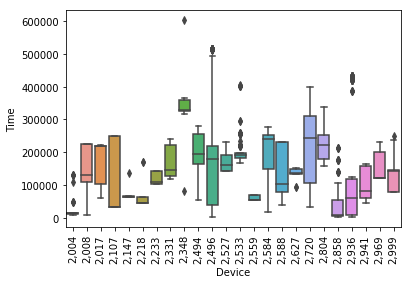

In [12]:
plt.figure()
ax = sns.boxplot(x = "Device", y = "Time", data = df)
plt.xticks(rotation = 'vertical')

In [13]:
df["HvLatitude"].describe()

count    2461.000000
mean       40.243106
std         0.073653
min        40.109000
25%        40.236000
50%        40.236000
75%        40.254000
max        41.623000
Name: HvLatitude, dtype: float64

In [14]:
df["HvLongitude"].describe()

count    2461.000000
mean      -83.393542
std         0.086106
min       -83.584000
25%       -83.447000
50%       -83.367000
75%       -83.367000
max       -83.101000
Name: HvLongitude, dtype: float64

C:\Users\casey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(40.2, 40.4)

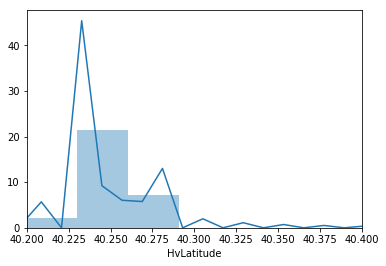

In [15]:
plt.figure()
sns.distplot(df["HvLatitude"])
plt.xlim(40.2,40.4)

(-83.6, -83.3)

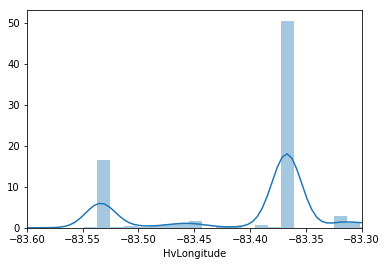

In [16]:
plt.figure()
sns.distplot(df["HvLongitude"])
plt.xlim(-83.6, -83.3)

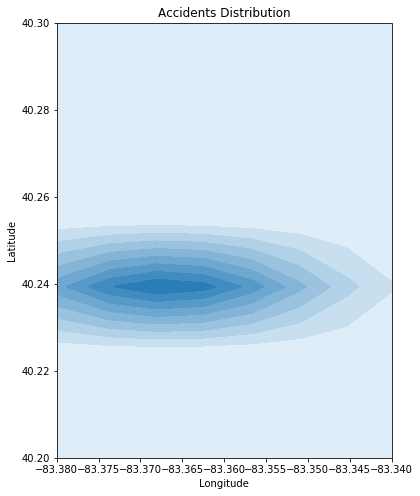

In [17]:
# Plot lat/lon of accidents, will take a few seconds
city_long_border = (-83.38, -83.34)
city_lat_border = (40.2, 40.3)

plt.figure(figsize=(6,8))
sns.kdeplot(df["HvLongitude"], df["HvLatitude"], shade=True)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accidents Distribution")
plt.show();

# Dataset 2

In [21]:
host = pd.read_csv('Data/host.csv')
host.head()

,Device,Trip,Time,LocalTimeMS,Latitude,Longitude,Elevation,Heading,GpsSpeed,GpsFixType,...,SteerAngle,TurnSignal,Headlamp,Wiper,TransState,StabilityControlStatus,ABSStatus,TracControlStatus,ClosestIntersectId,Distance
0,2218,432,1391000,81787741,34.079705,-84.641423,255.669998,74.260002,20.652681,2.0,...,0.0,0.0,0,0,2,0,0,0,0,342896.68750
1,2218,432,1390950,81787241,34.079679,-84.641531,255.669998,75.190002,21.088972,2.0,...,0.0,0.0,0,0,2,0,0,0,0,342886.34375
2,2218,432,1390900,81786741,34.079656,-84.641641,255.669998,74.370003,21.495972,2.0,...,0.0,0.0,0,0,2,0,0,0,0,342875.81250
3,2218,432,1390850,81786241,34.079628,-84.641752,255.770004,74.389999,21.132139,2.0,...,0.0,0.0,0,0,2,0,0,0,0,342865.06250
4,2218,432,1390800,81785741,34.079602,-84.641864,255.869995,74.480003,22.103390,2.0,...,0.0,0.0,0,0,2,0,0,0,0,342854.50000


In [22]:
host.rename(columns = lambda column: column.strip(), inplace = True)

#### Cleaning

In [23]:
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 6]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

df_interact(host)

interactive(children=(IntSlider(value=0, description='row', max=50000, step=5), IntSlider(value=0, description…

(50000 rows, 28 columns) total


*Check for well formed column names*

*Check row values...*

column names seem fine, but not the most descriptive due to space...

Row values:
gpsfix type is mostly 2.0-dgps fix(basically it's a normal thing)

what are semimaj, semimin axis, orientsemimaj(of earth or car???)--explore more

wiper--only 0 and 255?--255 = high?

Distance--missing values

closestintersectid, ABSstatus, stabilitycontrol status seems to be always 0...(we can probably join closestintersectionid...later...abs, stabiity are probably rare).

Transtate either 0 or 2?(neutral or forward)

*SemiMajorAxis*

In [24]:
host['GpsSemiMinAxis'].describe()

count    50000.000000
mean         0.392999
std          0.149568
min          0.184391
25%          0.290689
50%          0.380000
75%          0.450000
max          4.800000
Name: GpsSemiMinAxis, dtype: float64

*Ask more questions:*


1. Missing values?
2. Missing values that are filled?
3. Which parts of data entered by humans?

In [25]:
#1. Missing values
null_rows = host.isnull().any(axis = 1)
host[null_rows]

#no nulls awesome

,Device,Trip,Time,LocalTimeMS,Latitude,Longitude,Elevation,Heading,GpsSpeed,GpsFixType,...,SteerAngle,TurnSignal,Headlamp,Wiper,TransState,StabilityControlStatus,ABSStatus,TracControlStatus,ClosestIntersectId,Distance
38212,2107,281,11830,76161687,40.055707,-81.274887,316.739990,272.119995,36.958374,2.0,...,0.15625,0.0,0,255,2,0,0,0,0,NaN
38213,2107,256,11830,52573600,40.162893,-79.756802,236.639999,60.959999,30.680708,2.0,...,-0.31250,0.0,0,255,2,0,0,0,0,NaN
38214,2147,271,11830,70158113,39.974231,-83.091080,214.570007,271.109985,31.905819,2.0,...,-1.18750,0.0,0,0,2,0,0,0,0,NaN
38215,2218,420,11830,66606721,38.204639,-85.682292,112.070000,237.470001,29.926834,2.0,...,0.00000,0.0,0,0,2,0,0,0,0,NaN
38216,2218,432,11830,79707550,34.565737,-84.942974,168.270004,150.960007,32.159679,2.0,...,0.00000,0.0,0,0,2,0,0,0,0,NaN
38217,2331,121,11830,54350931,36.019240,-79.087512,136.149994,349.910004,32.486515,2.0,...,-0.03125,0.0,0,255,2,0,0,0,0,NaN
38218,2936,223,11830,8179451,36.377075,-86.713312,135.470001,164.660004,31.367264,2.0,...,-0.37500,0.0,2,0,2,0,0,0,0,NaN
38219,2936,694,11830,7794448,37.576001,-85.873210,174.369995,189.710007,34.426445,2.0,...,2.78125,0.0,2,1,2,0,0,0,0,NaN
38220,2969,185,11830,27103601,39.386735,-84.208984,193.300003,61.480000,32.408401,2.0,...,-1.28125,0.0,2,0,2,0,0,0,0,NaN
38221,2936,694,1182950,77943548,37.576185,-85.873171,174.470001,189.740005,34.445457,2.0,...,2.68750,0.0,2,1,2,0,0,0,0,NaN


In [26]:
#cols with null values
host.isnull().any(axis = 0)
#only distance...hmm

Device                    False
Trip                      False
Time                      False
LocalTimeMS               False
Latitude                  False
Longitude                 False
Elevation                 False
Heading                   False
GpsSpeed                  False
GpsFixType                False
GpsSemiMajAxis            False
GpsSemiMinAxis            False
GpsOrientSemiMaj          False
BrakeStatus               False
Speed                     False
YawRate                   False
LongAccel                 False
ThrottlePosPct            False
SteerAngle                False
TurnSignal                False
Headlamp                  False
Wiper                     False
TransState                False
StabilityControlStatus    False
ABSStatus                 False
TracControlStatus         False
ClosestIntersectId        False
Distance                   True
dtype: bool

2. Misisng values filled in?
Nah
3. Eneterd by humans parts?
-doesnt seem like eit

In [27]:
#drop null rows for now
host.dropna(inplace = True)

#### Data Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

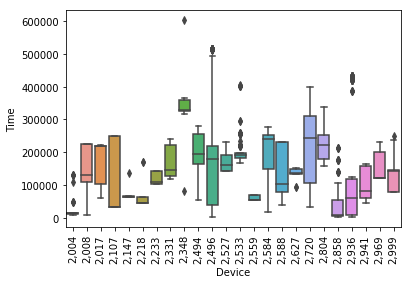

In [28]:
plt.figure()
ax = sns.boxplot(x = "Device", y = "Time", data = df)
plt.xticks(rotation = 'vertical')

C:\Users\casey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


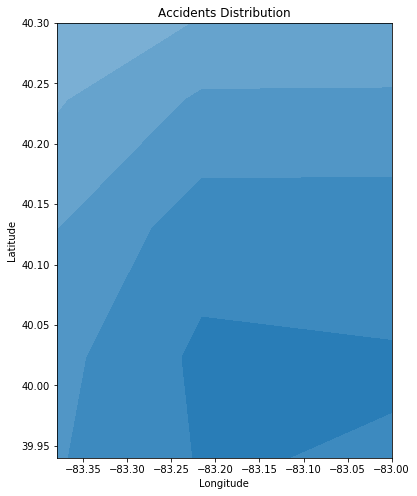

In [29]:
# Plot lat/lon of accidents, will take a few seconds
city_long_border = (-83.38, -83)
city_lat_border = (39.94, 40.3)

plt.figure(figsize=(6,8))
sns.kdeplot(host["Longitude"], host["Latitude"], shade=True)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accidents Distribution")
plt.show();

# Dataset 3

In [ ]:
rv = pd.read_csv("Data/RvBsm.csv")
rv.head()

#### Cleaning

In [ ]:
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 6]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

df_interact(rv)

*Check for well formed column names*

*Check row values...*

Nativeflag always 0,-still confused


bsmpsid 1 or 32--what is this?


*Ask more questions:*


1. Missing values?
2. Missing values that are filled?
3. Which parts of data entered by humans?

In [ ]:
#1. Missing values
null_rows = rv.isnull().any(axis = 1)
rv[null_rows]

#no nulls awesome

#2 No, #3 none

In [ ]:
rv.shape

In [ ]:
N = 20000
# Plot lat/lon of accidents, will take a few seconds
city_long_border = (-83.38, -83)
city_lat_border = (39.94, 40.3)

plt.figure(figsize=(6,8))
sample = rv.sample(N)
sns.kdeplot(sample["Longitude"], sample["Latitude"], shade=True)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accidents Distribution")
plt.show();